## EDA Report

In [1]:
# Installing the package
#!pip3 install -U ucimlrepo 
# !pip3 install -U comorbidipy
# !pip3 install -U pandas==2.1.0


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [3]:
from ucimlrepo import fetch_ucirepo
diabetes_dataset = fetch_ucirepo(id=296)

# access metadata
print(diabetes_dataset.metadata.uci_id)
print(diabetes_dataset.metadata.num_instances)
print(diabetes_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(diabetes_dataset.variables)

296
101766
The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalizati

In [4]:
features = diabetes_dataset.data.features # Get list of features
targets = diabetes_dataset.data.targets # Get list of targets

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

We have 47 features, which is a lot. We see which columns are mostly useless and empty

In [6]:
import pandas as pd
import numpy as np

missing_percent = features.isnull().mean() * 100

# Top value % (dominance of the most frequent value)
top_value_percent = features.apply(lambda col: col.value_counts(normalize=True, dropna=False).iloc[0] * 100)

summary = pd.DataFrame({
    'missing_%': missing_percent,
    'top_value_%': top_value_percent
})

print(summary)

                          missing_%  top_value_%
race                       2.233555    74.778413
gender                     0.000000    53.758623
age                        0.000000    25.615628
weight                    96.858479    96.858479
admission_type_id          0.000000    53.053083
discharge_disposition_id   0.000000    59.188727
admission_source_id        0.000000    56.496276
time_in_hospital           0.000000    17.447871
payer_code                39.557416    39.557416
medical_specialty         49.082208    49.082208
num_lab_procedures         0.000000     3.152330
num_procedures             0.000000    45.842423
num_medications            0.000000     5.980386
number_outpatient          0.000000    83.551481
number_emergency           0.000000    88.814535
number_inpatient           0.000000    66.456380
diag_1                     0.020636     6.742920
diag_2                     0.351787     6.634829
diag_3                     1.398306    11.354480
number_diagnoses    

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

summary = summary.reset_index()

missing_high = summary[summary['missing_%'] > 50][['index', 'missing_%']]



In [8]:
missing_high

,index,missing_%
3,weight,96.858479
20,max_glu_serum,94.746772
21,A1Cresult,83.277322


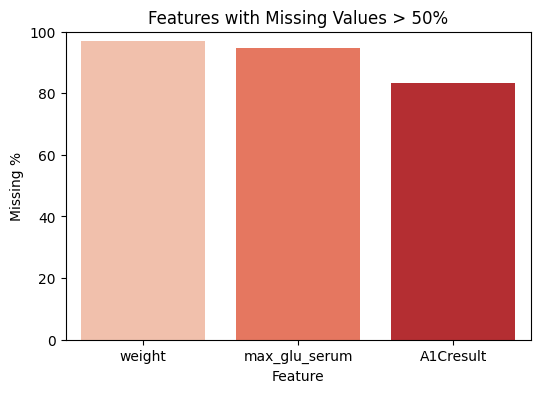

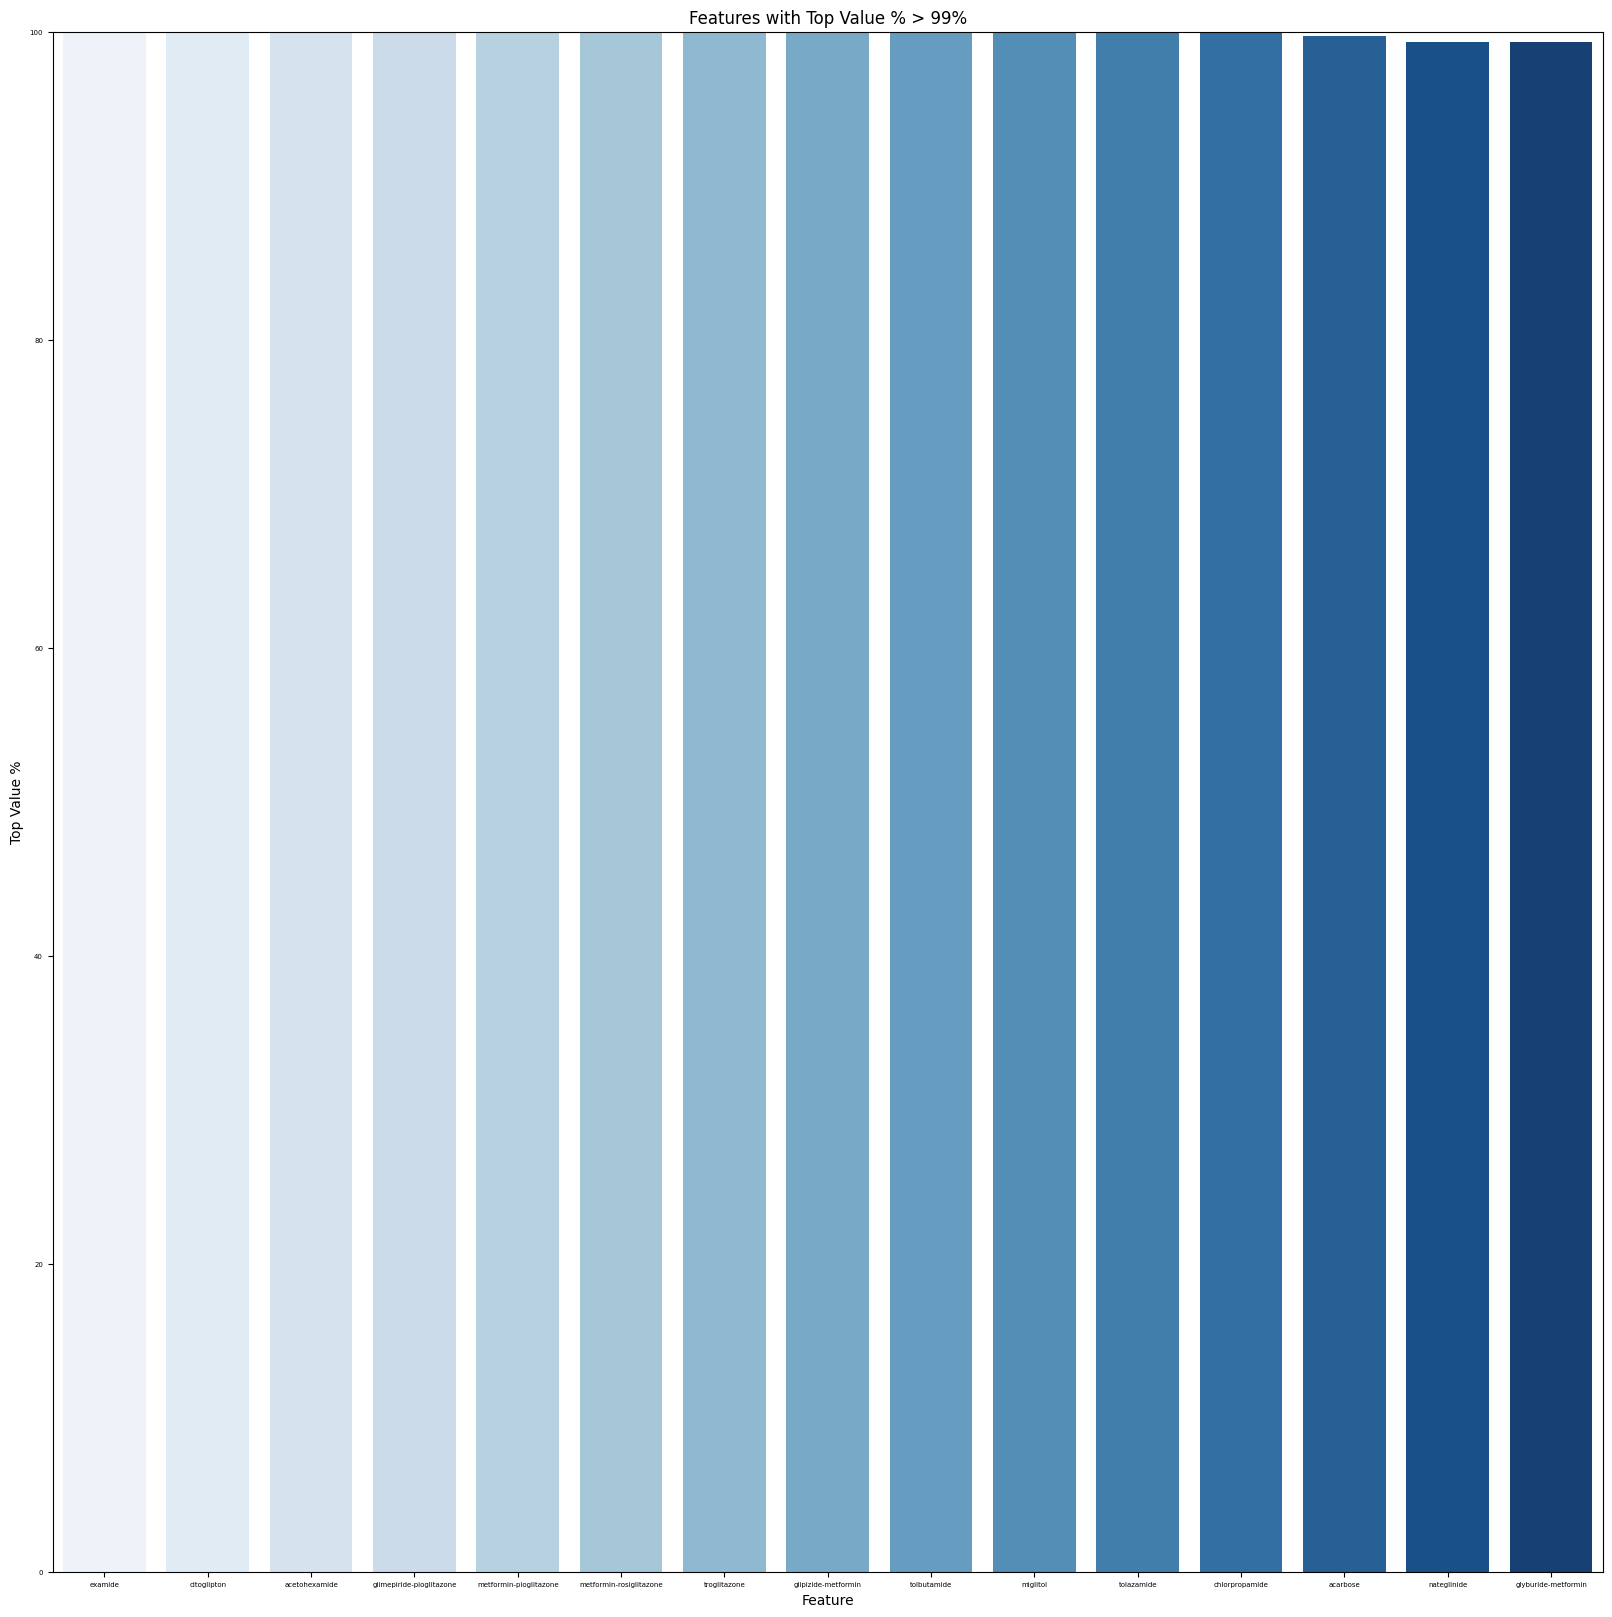

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(data=missing_high, x='index', y='missing_%', palette='Reds')
plt.title("Features with Missing Values > 50%")
plt.ylabel("Missing %")
plt.xlabel("Feature")
plt.ylim(0, 100)
plt.show()

topvalue_high = summary[summary['top_value_%'] > 99][['index', 'top_value_%']].sort_values(by = 'top_value_%', ascending = False)

plt.figure(figsize=(20, 20))
sns.barplot(data=topvalue_high, x='index', y='top_value_%', palette='Blues')
plt.title("Features with Top Value % > 99%")
plt.ylabel("Top Value %")
plt.xlabel("Feature")
plt.ylim(0, 100)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.show()

### Initial EDA summary

1. Columns 'examide' and 'citoglipton' have constant value False. We drop these columns as it has no variance that can be used for prediction.
2. Columns 'weight', 'max_glu_serum', 'A1Cresult' have columns that have over 50% missing values. We also drop these columns as well.
3. Columns that have high percentage of same values (99% and above) we will also drop. This includes 'nateglinide','chlorpropamide', 'acetohexamide', 'tolbutamide','acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'.

In [10]:
features = features.drop(columns = ['weight', 'max_glu_serum', 'A1Cresult', 'examide', 'citoglipton','nateglinide','chlorpropamide', 'acetohexamide', 'tolbutamide','acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']) # Dropping not useful columns

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                61510 non-null   object
 8   medical_specialty         51817 non-null   object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

Dropped to 28 columns now.

In [12]:
features.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,No,No,No,No,No,No,No,Up,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,Steady,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,No,No,No,No,No,No,No,Up,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,No,No,No,Steady,No,No,No,Steady,Ch,Yes


## Some initial distribution charts

In [13]:
import os
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_distributions_wordcloud(df, save_folder="charts", high_card_threshold=20):
    os.makedirs(save_folder, exist_ok=True)
    
    # Dark theme settings
    sns.set_style("darkgrid")
    plt.rcParams['figure.facecolor'] = '#1E1E1E'
    plt.rcParams['axes.facecolor'] = '#1E1E1E'
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    
    numeric_palette = sns.color_palette("coolwarm", 10)
    
    for col in df.columns:
        plt.figure(figsize=(6, 4))
        unique_vals = df[col].nunique(dropna=True)
        
        # Numeric variables
        if pd.api.types.is_numeric_dtype(df[col]) and unique_vals > 2:
            sns.histplot(df[col], kde=True, bins=20, color=numeric_palette[5])
            plt.title(f'{col} (Numeric)', fontsize=12)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Count', fontsize=10)
            
            # Compute stats
            stats = df[col].describe()
            skewness = df[col].skew()
            kurt = df[col].kurtosis()
            
            # Prepare annotation text
            stat_text = (
                f"Mean: {stats['mean']:.2f}\n"
                f"Median: {df[col].median():.2f}\n"
                f"Std: {stats['std']:.2f}\n"
                f"Skew: {skewness:.2f}\n"
                f"Kurt: {kurt:.2f}"
            )
            
            # Add text box inside plot
            plt.gca().text(
                0.98, 0.95, stat_text,
                transform=plt.gca().transAxes,
                fontsize=8, color='white',
                ha='right', va='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="#333333", edgecolor="white", alpha=0.6)
            )
        
        # High-cardinality categorical → Word Cloud
        elif pd.api.types.is_object_dtype(df[col]) and unique_vals > high_card_threshold:
            text = ' '.join(df[col].astype(str))
            wc = WordCloud(width=800, height=400, background_color="#1E1E1E",
                           colormap="viridis", contour_color='white', contour_width=0.5).generate(text)
            plt.imshow(wc, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'{col} (High-cardinality Word Cloud)', fontsize=12, color='white')
        
        # Moderate cardinality categorical → countplot sorted
        else:
            counts = df[col].value_counts()
            order = counts.index
            sns.countplot(data=df, x=col, palette='pastel', order=order)
            plt.title(f'{col} (Categorical)', fontsize=12)
            plt.ylabel('Count', fontsize=10)
            plt.xlabel(col, fontsize=10)
        
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)
        plt.show()

        filename = os.path.join(save_folder, f"{col}_distribution.png")
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        plt.close()


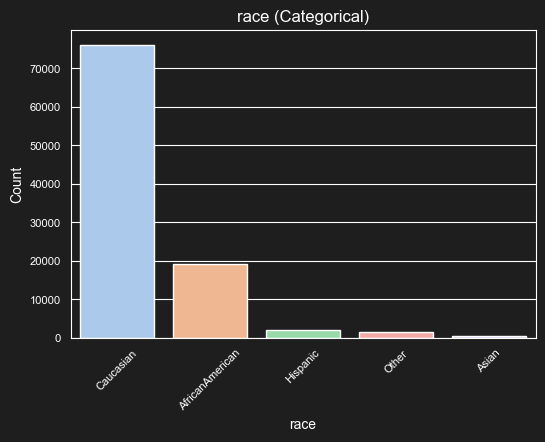

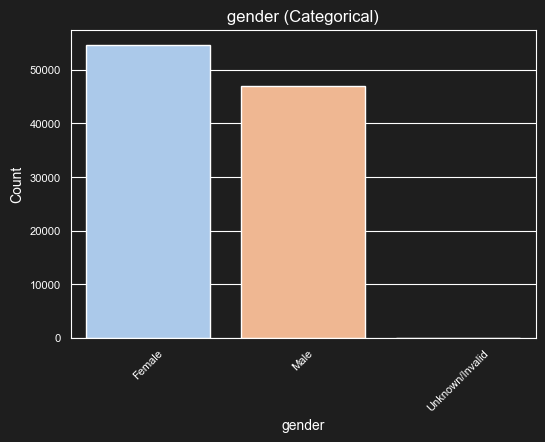

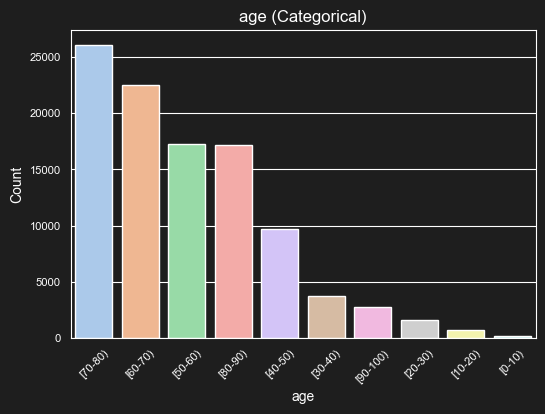

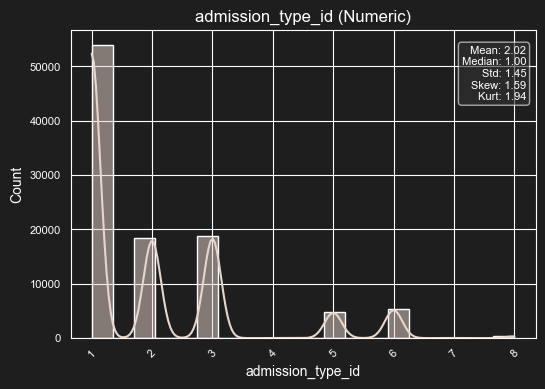

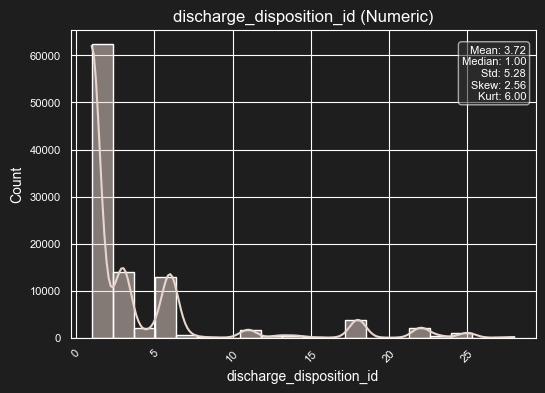

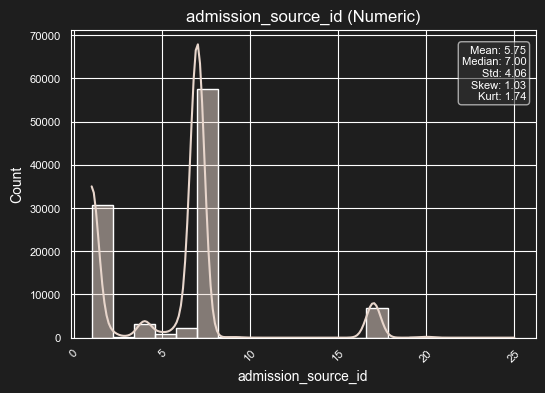

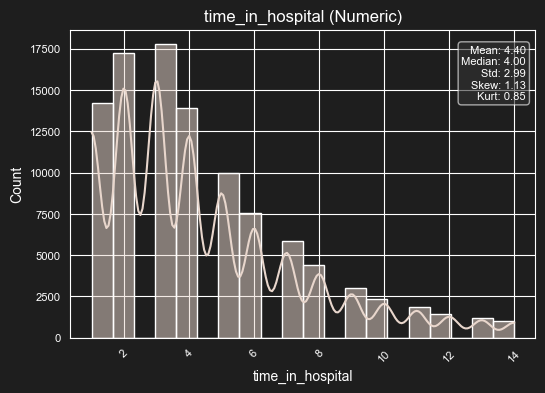

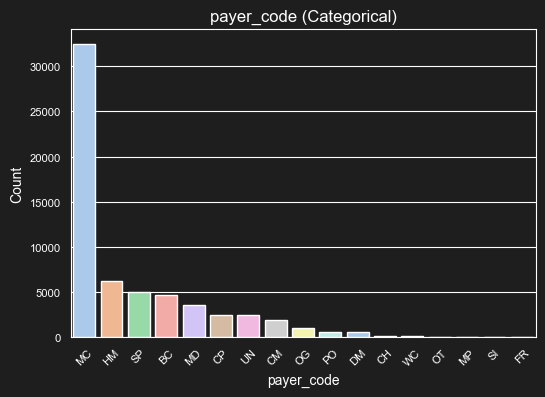

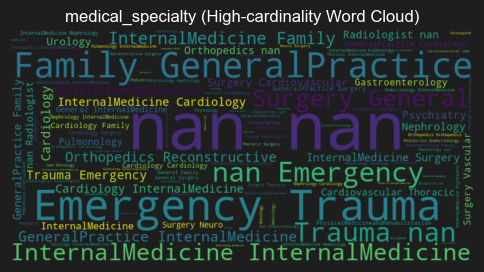

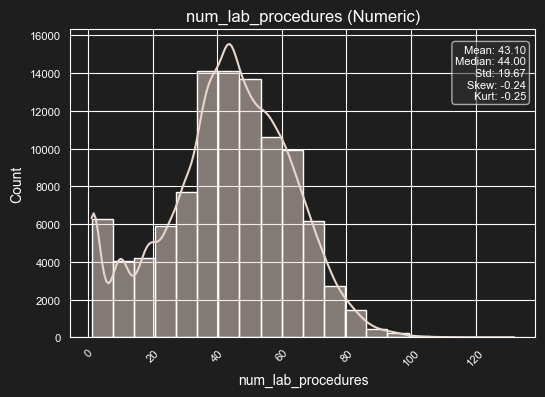

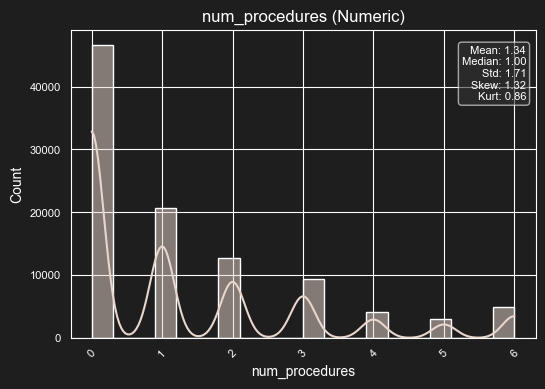

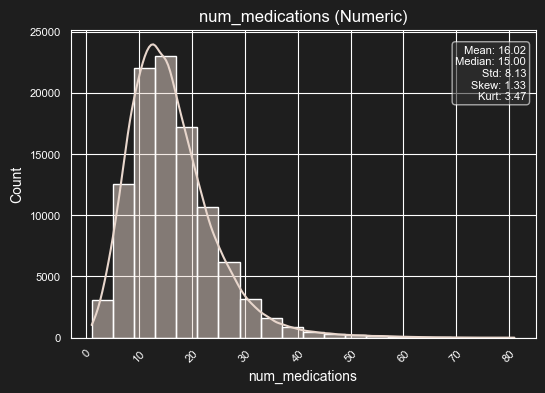

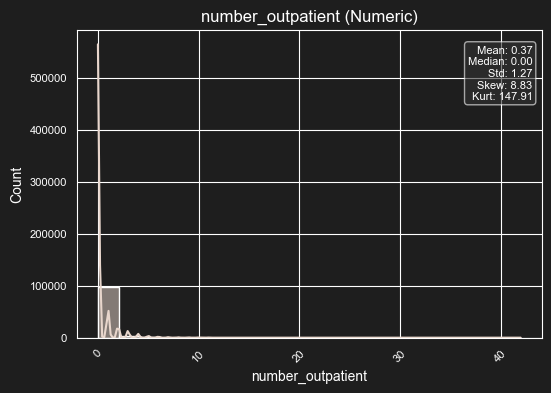

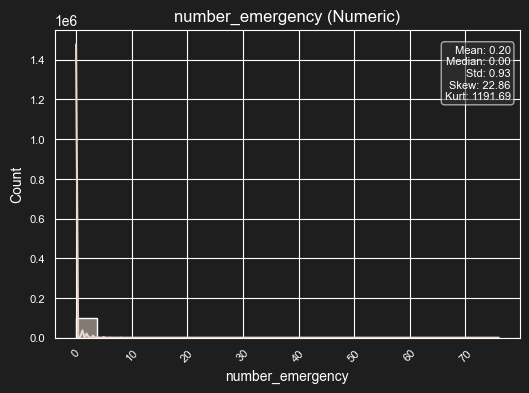

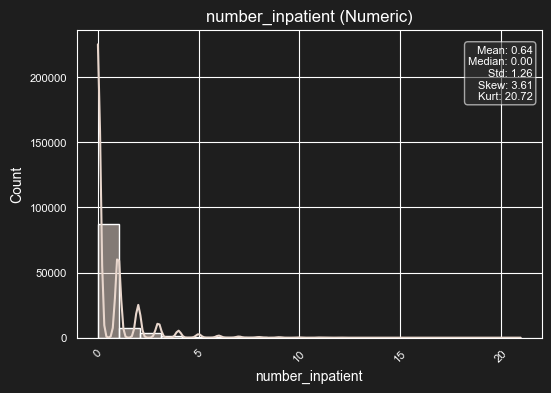

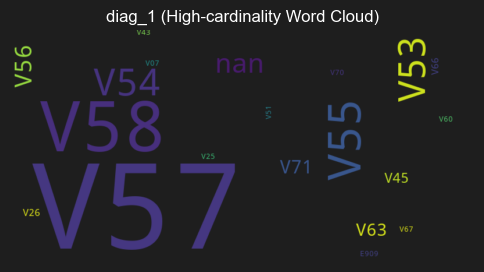

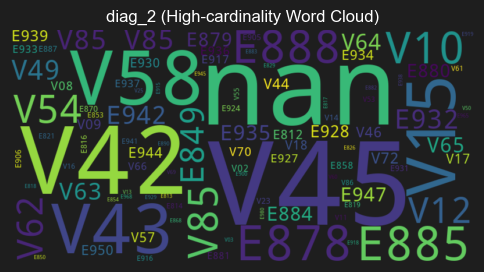

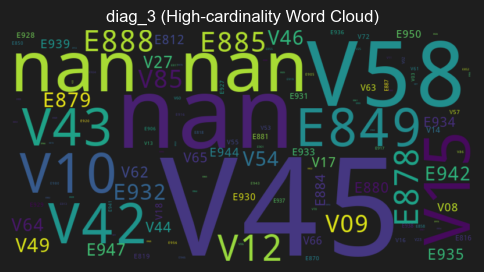

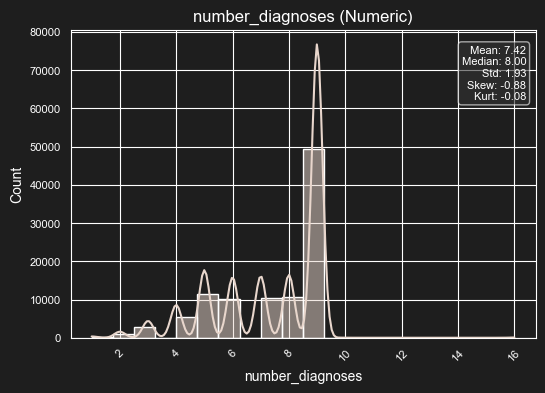

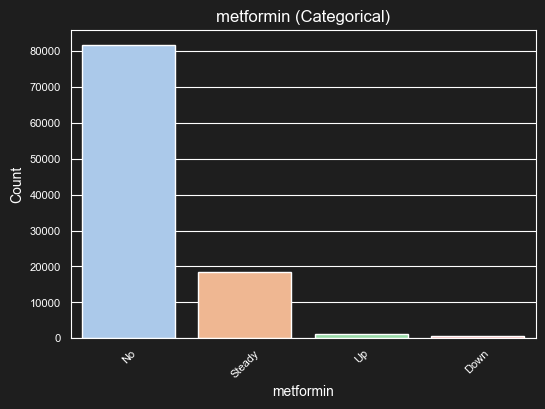

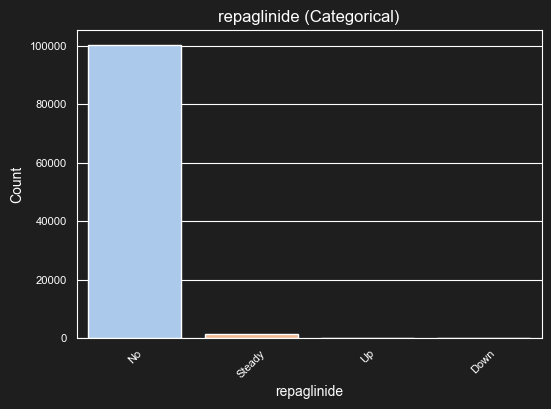

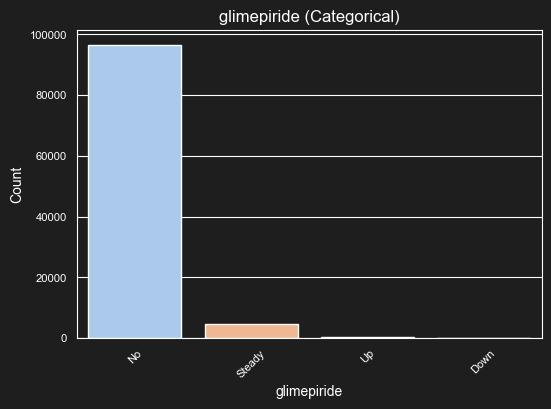

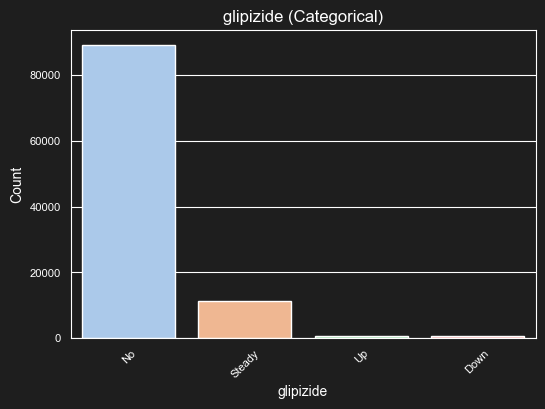

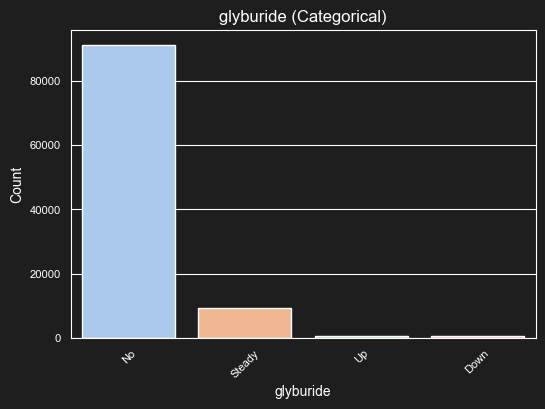

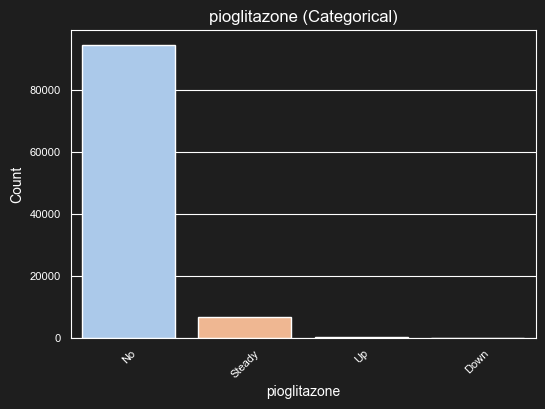

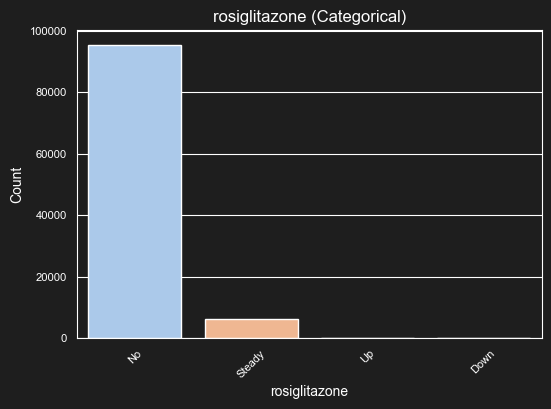

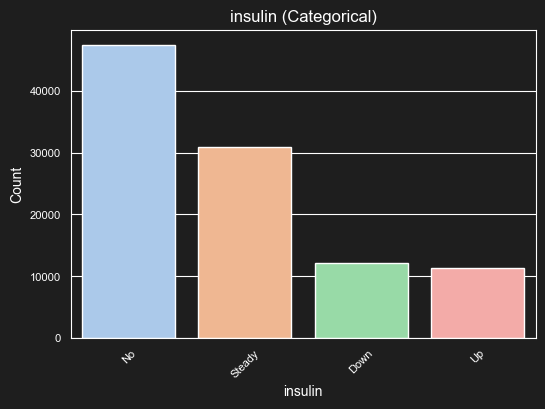

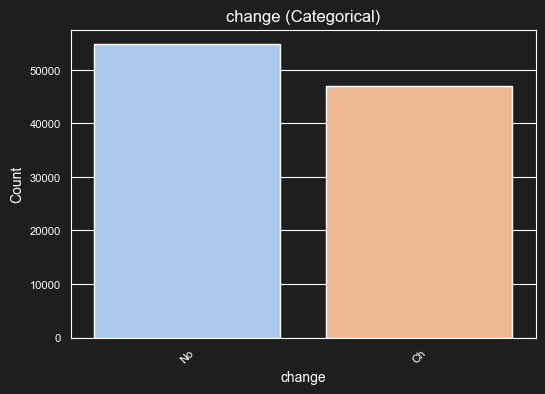

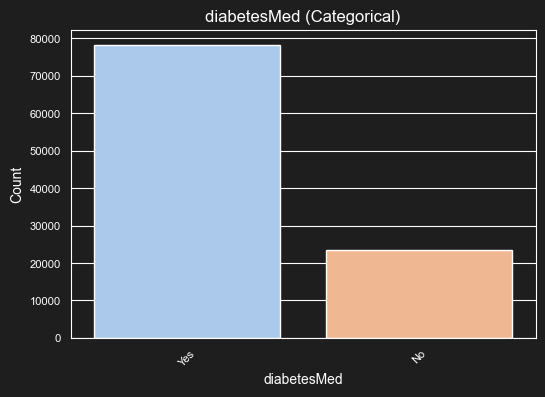

In [14]:
plot_distributions_wordcloud(features, save_folder="charts", high_card_threshold=20)


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                61510 non-null   object
 8   medical_specialty         51817 non-null   object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

## Cramer-V for categorical variables

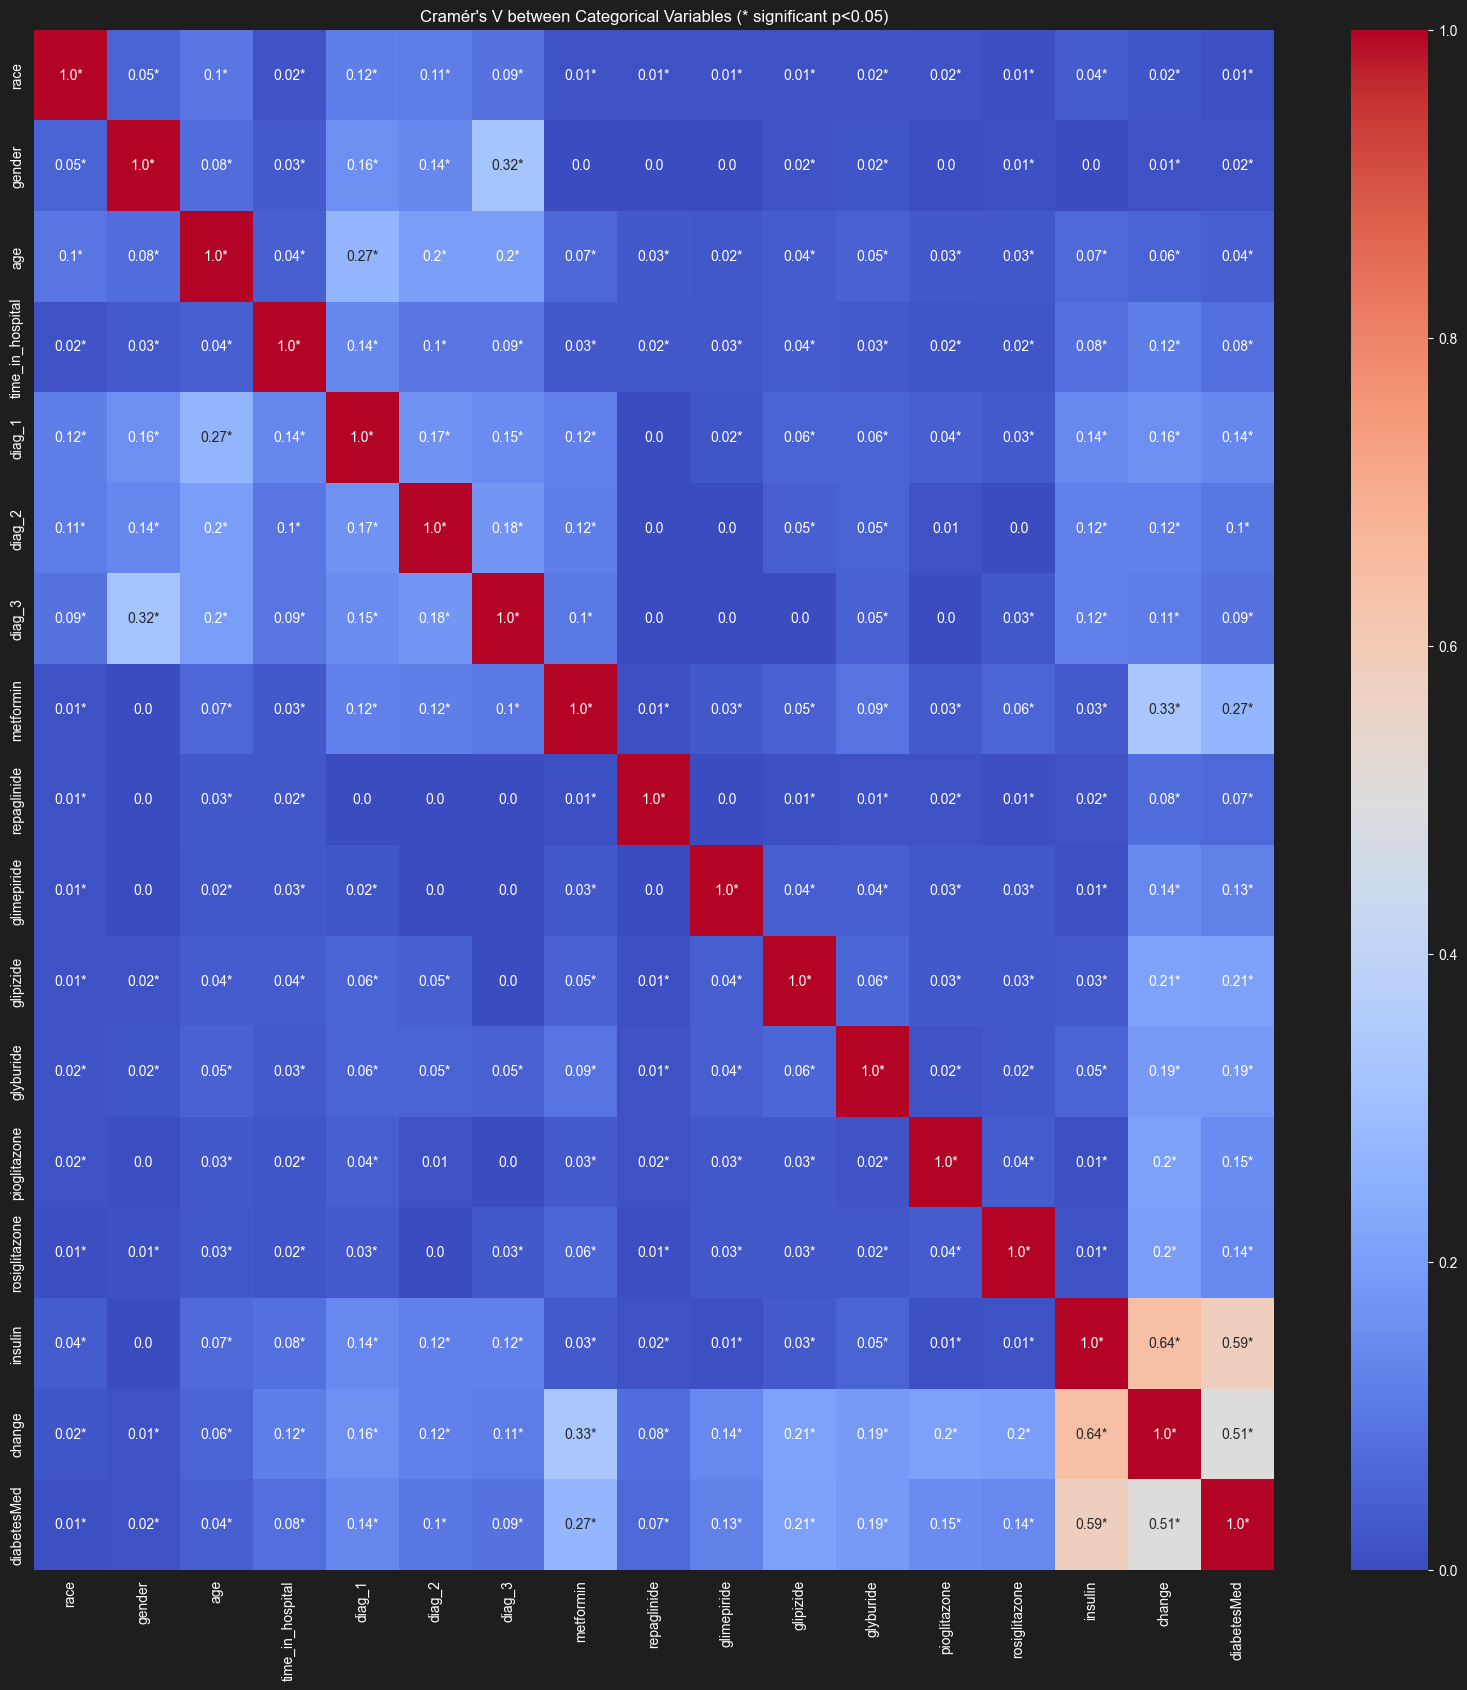

In [16]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
#    Calculate Cramér's V for categorical-categorical association.
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return v, p  # return both Cramér's V and p-value

cat_cols = ['race', 'gender', 'age', 'time_in_hospital', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide','glimepiride','glipizide', 'glyburide','pioglitazone','rosiglitazone','insulin','change','diabetesMed']
n = len(cat_cols)

cramers_matrix = pd.DataFrame(np.zeros((n, n)), index=cat_cols, columns=cat_cols)
pvalue_matrix = pd.DataFrame(np.ones((n, n)), index=cat_cols, columns=cat_cols)

# Compute pairwise Cramér's V and p-value
for i in cat_cols:
    for j in cat_cols:
        v, p = cramers_v(features[i], features[j])
        cramers_matrix.loc[i, j] = v
        pvalue_matrix.loc[i, j] = p

# Prepare annotations (add * if significant)
annotations = cramers_matrix.round(2).astype(str)
significant = pvalue_matrix < 0.05
annotations = annotations + significant.replace({True: '*', False: ''})

# Dark-themed heatmap
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

plt.figure(figsize=(20, 20))
sns.heatmap(cramers_matrix, annot=annotations, cmap='coolwarm', vmin=0, vmax=1, fmt='')
plt.title("Cramér's V between Categorical Variables (* significant p<0.05)", fontsize=12, color='white')
plt.show()

filename = os.path.join('charts', f"cramer_v_heatmap.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()




## Target Variable

In [17]:
targets.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [18]:
missing_percent = targets.isnull().mean() * 100

top_value_percent = targets.apply(lambda col: col.value_counts(normalize=True, dropna=False).iloc[0] * 100)

summary = pd.DataFrame({
    'missing_%': missing_percent,
    'top_value_%': top_value_percent
})

print(summary)

            missing_%  top_value_%
readmitted        0.0    53.911916


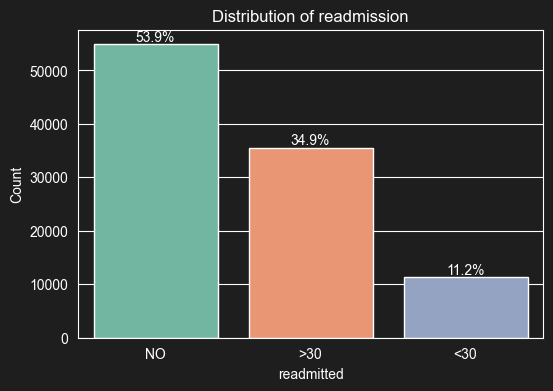

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=targets, x='readmitted', palette='Set2')
plt.title(f'Distribution of readmission', fontsize=12)
plt.xlabel('readmitted')
plt.ylabel('Count')

total = len(targets['readmitted'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', 
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.show()


In [20]:
from pandas.api.types import CategoricalDtype


target_order = ['NO', '<30', '>30']

cat_type = CategoricalDtype(categories=target_order, ordered=True)
targets['target_encoded'] = targets['readmitted'].astype(cat_type).cat.codes
targets['target_encoded'] = targets['target_encoded'].replace({2:0})

             feature  cramers_v       p_value
4             diag_1   0.102206  6.039414e-92
6             diag_3   0.085349  8.069525e-49
5             diag_2   0.078520  1.845086e-39
3   time_in_hospital   0.053255  1.106338e-56
14           insulin   0.042965  3.981889e-41
2                age   0.032518  6.597923e-21
16       diabetesMed   0.026906  5.565116e-18
7          metformin   0.023406  1.085303e-12
15            change   0.019221  5.212417e-10
8        repaglinide   0.009419  7.286841e-03
10         glipizide   0.009144  9.272622e-03
9        glimepiride   0.006231  7.348629e-02
12      pioglitazone   0.005777  9.385151e-02
13     rosiglitazone   0.004900  1.420400e-01
0               race   0.004813  1.774877e-01
11         glyburide   0.003995  2.014449e-01
1             gender   0.000000  5.386833e-01


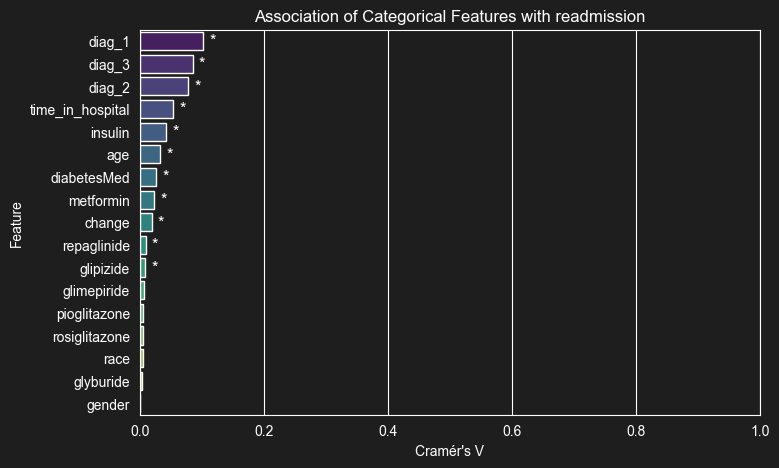

In [21]:
cat_features = cat_cols

results = []

for col in cat_features:
    v, p = cramers_v(features[col], targets['target_encoded'])
    results.append({'feature': col, 'cramers_v': v, 'p_value': p})

association_df = pd.DataFrame(results).sort_values(by='cramers_v', ascending=False)
print(association_df)

plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

ax = sns.barplot(data=association_df, x='cramers_v', y='feature', palette='viridis')

for bar, p in zip(ax.patches, association_df['p_value']):
    if p < 0.05:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(width + 0.01, y, '*', va='center', color='white', fontsize=12)

plt.xlabel("Cramér's V")
plt.ylabel("Feature")
plt.title(f"Association of Categorical Features with readmission", fontsize=12, color='white')
plt.xlim(0, 1)
plt.show()

filename = os.path.join('charts', f"cramer_v_association_with_readmission.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()

## Correlation against each other

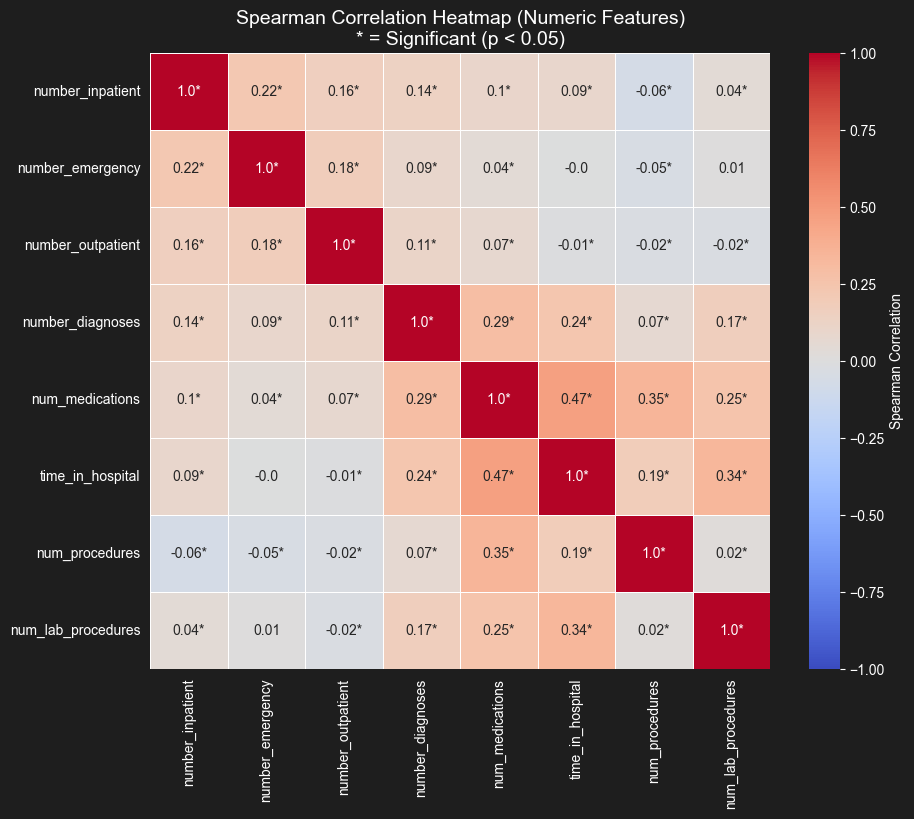

In [22]:
from scipy.stats import spearmanr

num_cols = ['number_inpatient', 'number_emergency', 'number_outpatient', 'number_diagnoses', 'num_medications', 'time_in_hospital', 'num_procedures', 'num_lab_procedures']


# Initialize empty matrices
n = len(num_cols)
corr_matrix = pd.DataFrame(np.zeros((n, n)), index=num_cols, columns=num_cols)
pval_matrix = pd.DataFrame(np.ones((n, n)), index=num_cols, columns=num_cols)

# Compute pairwise Spearman correlations and p-values
for i in range(n):
    for j in range(n):
        corr, p = spearmanr(features[num_cols[i]], features[num_cols[j]], nan_policy='omit')
        corr_matrix.iloc[i, j] = corr
        pval_matrix.iloc[i, j] = p

# Create annotation matrix (correlation with stars for significance)
annotations = corr_matrix.round(2).astype(str)
stars = pval_matrix.applymap(lambda p: '*' if p < 0.05 else '')
annotations = annotations + stars

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

sns.heatmap(
    corr_matrix, 
    annot=annotations, fmt="", 
    cmap="coolwarm", vmin=-1, vmax=1, 
    linewidths=0.5, 
    cbar_kws={'label': 'Spearman Correlation'}
)

plt.title("Spearman Correlation Heatmap (Numeric Features)\n* = Significant (p < 0.05)", fontsize=14, color='white')
plt.show()

## Spearman Correlation (numeric variables) against the target

              feature  spearman_corr       p_value
0    number_inpatient       0.138382  0.000000e+00
1    number_emergency       0.063438  3.058029e-91
5    time_in_hospital       0.050904  2.269597e-59
3    number_diagnoses       0.047230  2.361566e-51
4     num_medications       0.045423  1.252210e-47
2   number_outpatient       0.034169  1.112791e-27
7  num_lab_procedures       0.020564  5.353698e-11
6      num_procedures      -0.006113  5.115225e-02


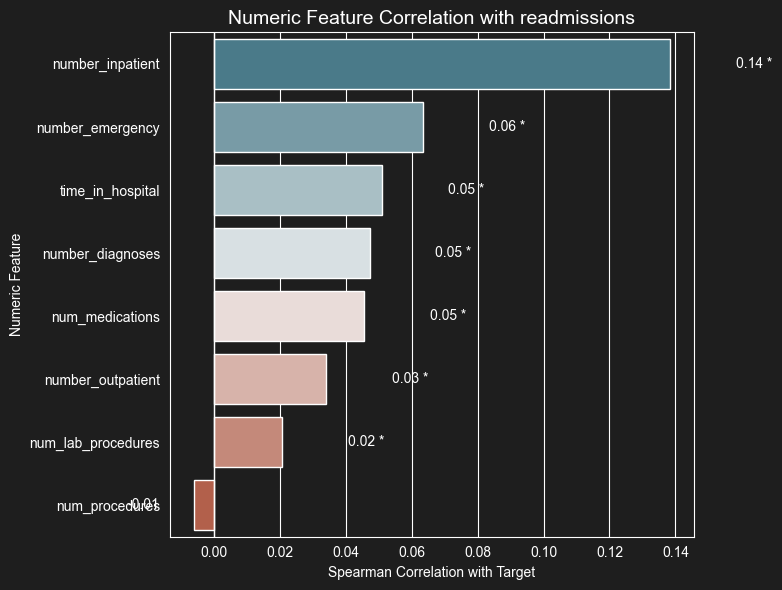

In [23]:
numeric_features = ['number_inpatient', 'number_emergency', 'number_outpatient', 'number_diagnoses', 'num_medications', 'time_in_hospital', 'num_procedures', 'num_lab_procedures']

results = []
for col in numeric_features:
    rho, p_value = spearmanr(features[col], targets['target_encoded'])
    results.append({'feature': col, 'spearman_corr': rho, 'p_value': p_value})

correlation_df = pd.DataFrame(results).sort_values(by='spearman_corr', key=abs, ascending=False)

print(correlation_df)


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

ax = sns.barplot(
    data=correlation_df,
    x='spearman_corr',
    y='feature',
    palette=sns.diverging_palette(220, 20, n=len(correlation_df), center="light")
)

# Add numeric labels at the end of each bar
for bar, corr, p in zip(ax.patches, correlation_df['spearman_corr'], correlation_df['p_value']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        width + 0.02*np.sign(width), y,
        f"{corr:.2f}" + (" *" if p < 0.05 else ""),
        va='center', color='white', fontsize=10
    )

plt.xlabel("Spearman Correlation with Target")
plt.ylabel("Numeric Feature")
plt.title("Numeric Feature Correlation with readmissions", fontsize=14, color='white')
plt.axvline(0, color='white', linewidth=1)
plt.tight_layout()
plt.show()

filename = os.path.join('charts', f"spearman_correlation_association_with_readmission.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()

# Modelling

## Feature selection

1. We will take categories that are significant correlated with the target variable. This means dropping the glyburide column based on our EDA analysis
2. We also drop repaglinide, glimepiride and rosiglitazone, metaformin, gllipizide, pioglitazone as the value counts are very small and is mostly populated with one value only.
3.  We drop the num_procedures, num_lab_procedures, num_medications, 
4. Drop payer_code, medical_specialty for too many blank


In [24]:
features = features.drop(columns = ['glyburide', 'glimepiride', 'repaglinide', 'rosiglitazone','glipizide', 'pioglitazone', 'num_lab_procedures', 'num_procedures',  'payer_code', 'medical_specialty', 'race', 'gender', 'num_medications', 'number_outpatient', 'change', 'diabetesMed'])

In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   age                       101766 non-null  object
 1   admission_type_id         101766 non-null  int64 
 2   discharge_disposition_id  101766 non-null  int64 
 3   admission_source_id       101766 non-null  int64 
 4   time_in_hospital          101766 non-null  int64 
 5   number_emergency          101766 non-null  int64 
 6   number_inpatient          101766 non-null  int64 
 7   diag_1                    101745 non-null  object
 8   diag_2                    101408 non-null  object
 9   diag_3                    100343 non-null  object
 10  number_diagnoses          101766 non-null  int64 
 11  metformin                 101766 non-null  object
 12  insulin                   101766 non-null  object
dtypes: int64(7), object(6)
memory usage: 10.1+ MB


### Binarize the targets

Given that we want to predict hospital readmission of below 30 days, we can just binarize the targets instead.

In [26]:
targets['target_encoded'] = targets['target_encoded'].replace({2: 0})
targets = targets.drop(columns = 'readmitted')

In [27]:
combined_df = pd.concat([features, targets], axis=1)


## Dropping Missing Data rows

1. Drop for those diag_1, diag_2, diag_3 = ?
2. Drop for race == '?'
3. Drop for discharge_disposition_id == 11 as expired

In [28]:
mask = (
        (combined_df[["diag_1", "diag_2", "diag_3"]] == "?").any(axis=1)
        | (combined_df["discharge_disposition_id"] == 11)  # Expired
    )
combined_df = combined_df[~mask]

## Train-test split

1. We train-test split the data to prevent data leakages
2. We oversample the minority class data first


In [29]:
def oversample_minority(X_train, y_train, random_state=42):
    
    np.random.seed(random_state)
        
    # Combine X and y temporarily for sampling
    train_combined = X_train.copy()
    train_combined['target'] = y_train
    
    # Identify majority and minority classes
    class_counts = y_train.value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()
    
    df_majority = train_combined[train_combined['target'] == majority_class]
    df_minority = train_combined[train_combined['target'] == minority_class]
    
    # Oversample minority with replacement
    df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=random_state)
    
    # Combine back
    df_balanced = pd.concat([df_majority, df_minority_oversampled], ignore_index=True)
    
    # Shuffle rows
    df_balanced = df_balanced.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Separate X and y again
    y_resampled = df_balanced[['target']]
    X_resampled = df_balanced.drop(columns=['target'])
    
    return X_resampled, y_resampled

In [30]:
from sklearn.model_selection import train_test_split

X = combined_df.drop(columns=targets.columns)
y = combined_df[targets.columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify = y
)
X_train, y_train = oversample_minority(X_train, y_train)


In [31]:
y_train

,target
0,1
1,1
2,0
3,1
4,0
...,...
142021,1
142022,1
142023,1
142024,1


## Filling in missing data

We fill with the most common value for categorical values, and the mean for the numeric values. However, for payer_code and medical specialty, because there is a bigger amount of missing variables, we create a new column called 'missing' instead.

In [32]:
from sklearn.impute import SimpleImputer
fill_missing_cols = ['race']

# --- 1️⃣ Fill 'missing' for specific categorical columns first ---
for col in fill_missing_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].fillna('missing')
    if col in X_test.columns:
        X_test[col] = X_test[col].fillna('missing')

numeric_cols = features.select_dtypes(include=[np.number]).columns
categorical_cols = features.select_dtypes(exclude=[np.number]).columns

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X_train_num = numeric_imputer.fit_transform(X_train[numeric_cols])
X_test_num = numeric_imputer.transform(X_test[numeric_cols])

X_train_cat = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test_cat = categorical_imputer.transform(X_test[categorical_cols])

# Rebuild dataframes
X_train = pd.concat([
    pd.DataFrame(X_train_num, columns=numeric_cols, index=X_train.index),
    pd.DataFrame(X_train_cat, columns=categorical_cols, index=X_train.index)
], axis=1)

X_test = pd.concat([
    pd.DataFrame(X_test_num, columns=numeric_cols, index=X_test.index),
    pd.DataFrame(X_test_cat, columns=categorical_cols, index=X_test.index)
], axis=1)



## Feature Engineering

In general, we will apply the feature engineering to both the X_train and X_test dataset simulatenously.

### Admission and Discharge ID

1. Recoded them into the smaller categories based on the ID mapping csv

In [33]:
# Re-encoding admission type, discharge type and admission source into fewer categories
X_train["admission_type_id"] = X_train["admission_type_id"].replace({2: 1, 7: 1, 6: 5, 8: 5})
X_test["admission_type_id"] = X_test["admission_type_id"].replace({2: 1, 7: 1, 6: 5, 8: 5})


discharge_mappings = {
    6: 1,
    8: 1,
    9: 1,
    13: 1,
    3: 2,
    4: 2,
    5: 2,
    14: 2,
    22: 2,
    23: 2,
    24: 2,
    12: 10,
    15: 10,
    16: 10,
    17: 10,
    25: 18,
    26: 18,
}
X_train["discharge_disposition_id"] = X_train["discharge_disposition_id"].replace(
    discharge_mappings
)
X_test["discharge_disposition_id"] = X_test["discharge_disposition_id"].replace(
    discharge_mappings
)

admission_mappings = {
    2: 1,
    3: 1,
    5: 4,
    6: 4,
    10: 4,
    22: 4,
    25: 4,
    15: 9,
    17: 9,
    20: 9,
    21: 9,
    13: 11,
    14: 11,
}
X_train["admission_source_id"] = X_train["admission_source_id"].replace(admission_mappings)
X_test["admission_source_id"] = X_test["admission_source_id"].replace(admission_mappings)


X_train[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']]= X_train[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].astype('category')
X_test[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']]= X_test[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].astype('category')

In [34]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   age                       101766 non-null  object
 1   admission_type_id         101766 non-null  int64 
 2   discharge_disposition_id  101766 non-null  int64 
 3   admission_source_id       101766 non-null  int64 
 4   time_in_hospital          101766 non-null  int64 
 5   number_emergency          101766 non-null  int64 
 6   number_inpatient          101766 non-null  int64 
 7   diag_1                    101745 non-null  object
 8   diag_2                    101408 non-null  object
 9   diag_3                    100343 non-null  object
 10  number_diagnoses          101766 non-null  int64 
 11  metformin                 101766 non-null  object
 12  insulin                   101766 non-null  object
dtypes: int64(7), object(6)
memory usage: 10.1+ MB


### Age

We group those 0-30 groups into one group given the low count for all these categories, and 80 and above as one group

In [35]:
X_train['age'].value_counts(normalize = True)

age
[70-80)     0.261727
[60-70)     0.221164
[80-90)     0.173482
[50-60)     0.162548
[40-50)     0.093525
[30-40)     0.038000
[90-100)    0.025552
[20-30)     0.017624
[10-20)     0.005337
[0-10)      0.001042
Name: proportion, dtype: float64

In [36]:
X_train['age']= X_train['age'].replace(['[0-10)', '[10-20)', '[20-30)'], '[0-30)')
X_test['age']= X_test['age'].replace(['[0-10)', '[10-20)', '[20-30)'], '[0-30)')

X_train['age']= X_train['age'].replace(['[80-90)', '[90-100)'], '[80-100)')
X_test['age']= X_test['age'].replace(['[80-90)', '[90-100)'], '[80-100)')

### Time in hospital

We standardize it using scikit learn standard scaler

In [37]:
from sklearn.preprocessing import StandardScaler

X_train['time_in_hospital'] = np.log1p(X_train['time_in_hospital'])
X_test['time_in_hospital'] = np.log1p(X_test['time_in_hospital'])

time_scaler = StandardScaler()
X_train['time_in_hospital'] = time_scaler.fit_transform(X_train[['time_in_hospital']])
X_test['time_in_hospital'] = time_scaler.transform(X_test[['time_in_hospital']])


### Number of lab procedures

1. The distribution is close to a normal distribution already. We can just standard scale it.

In [38]:
# lab_scaler = StandardScaler()
# X_train['num_lab_procedures'] = lab_scaler.fit_transform(X_train[['num_lab_procedures']])
# X_test['num_lab_procedures'] = lab_scaler.transform(X_test[['num_lab_procedures']])


In [39]:
# procedure_scaler = StandardScaler()
# X_train['num_procedures'] = procedure_scaler.fit_transform(X_train[['num_procedures']])
# X_test['num_procedures'] = procedure_scaler.transform(X_test[['num_procedures']])

### Number of medications

1. Log transform then standard scaler

In [40]:
# X_train['num_medications'] = np.log1p(X_train['num_medications'])
# X_test['num_medications'] = np.log1p(X_test['num_medications'])

# medication_scaler = StandardScaler()
# X_train['num_medications'] = medication_scaler.fit_transform(X_train[['num_medications']])
# X_test['num_medications'] = medication_scaler.transform(X_test[['num_medications']])


### Number of outpatient/ emergency /inpatient

1. Change into a categorical column instead - 0, 1 or more than 1

In [41]:
cols_to_bucket = ['number_emergency', 'number_inpatient']

for col in cols_to_bucket:
    X_train[col] = X_train[col].apply(lambda x: 'More than one' if x > 1 else str(int(x)))
    X_train[col] = X_train[col].astype('category')
    
    X_test[col] = X_test[col].apply(lambda x: 'More than one' if x > 1 else str(int(x)))
    X_test[col] = X_test[col].astype('category')


### Diagnosis categories

1. Apply frequency encoding to change it from a high cardinality column into a numeric one based on the proportion of times it appears in the training dataset.

In [42]:
cols_to_encode = ['diag_1', 'diag_2', 'diag_3']

def icd9_category(code):
    if pd.isna(code) or code == 'missing':
        return 'missing'
    code = str(code).upper()
    if code.startswith('V'):
        return 'V_codes'
    elif code.startswith('E'):
        return 'E_codes'
    else:
        # Numeric codes 001-999
        try:
            num = float(code)
        except:
            return 'other'
        if 1 <= num <= 139:
            return 'Infectious'
        elif 140 <= num <= 239:
            return 'Neoplasms'
        elif 240 <= num <= 279:
            return 'Endocrine'
        elif 280 <= num <= 289:
            return 'Blood'
        elif 290 <= num <= 319:
            return 'Mental'
        elif 320 <= num <= 389:
            return 'Nervous_Sense'
        elif 390 <= num <= 459:
            return 'Circulatory'
        elif 460 <= num <= 519:
            return 'Respiratory'
        elif 520 <= num <= 579:
            return 'Digestive'
        elif 580 <= num <= 629:
            return 'Genitourinary'
        elif 630 <= num <= 679:
            return 'Pregnancy'
        elif 680 <= num <= 709:
            return 'Skin'
        elif 710 <= num <= 739:
            return 'Musculoskeletal'
        elif 740 <= num <= 759:
            return 'Congenital'
        elif 760 <= num <= 779:
            return 'Perinatal'
        elif 780 <= num <= 799:
            return 'Symptoms'
        elif 800 <= num <= 999:
            return 'Injury'
        else:
            return 'other'

for col in cols_to_encode:
    X_train[f'{col}_category'] = X_train[col].apply(icd9_category)
    X_test[f'{col}_category'] = X_test[col].apply(icd9_category)


drop_cols = ['diag_1', 'diag_2', 'diag_3']
# # Drop all unwanted columns
X_train.drop(columns=drop_cols, inplace=True, errors='ignore')
X_test.drop(columns=drop_cols, inplace=True, errors='ignore')

# ============================================
# 6️⃣ Ensure test has same columns as train
# ============================================
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]



In [43]:
X_train.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_emergency,number_inpatient,number_diagnoses,age,metformin,insulin,diag_1_category,diag_2_category,diag_3_category
0,1.0,1.0,4.0,1.372426,0,0,8.0,[40-50),No,Down,Circulatory,Endocrine,Infectious
1,1.0,1.0,7.0,0.064100,0,1,9.0,[80-100),No,Down,Respiratory,Respiratory,Genitourinary
2,5.0,1.0,9.0,-1.665412,0,0,6.0,[50-60),No,No,Circulatory,Musculoskeletal,Symptoms
3,1.0,1.0,7.0,-0.900091,0,1,7.0,[60-70),Steady,Steady,Circulatory,Endocrine,Endocrine
4,1.0,18.0,7.0,-1.665412,0,More than one,9.0,[80-100),No,No,Symptoms,Genitourinary,Circulatory


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142026 entries, 0 to 142025
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   admission_type_id         142026 non-null  category
 1   discharge_disposition_id  142026 non-null  category
 2   admission_source_id       142026 non-null  category
 3   time_in_hospital          142026 non-null  float64 
 4   number_emergency          142026 non-null  category
 5   number_inpatient          142026 non-null  category
 6   number_diagnoses          142026 non-null  float64 
 7   age                       142026 non-null  object  
 8   metformin                 142026 non-null  object  
 9   insulin                   142026 non-null  object  
 10  diag_1_category           142026 non-null  object  
 11  diag_2_category           142026 non-null  object  
 12  diag_3_category           142026 non-null  object  
dtypes: category(5), float64(2), o

In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20025 entries, 37829 to 14867
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   admission_type_id         20025 non-null  category
 1   discharge_disposition_id  20025 non-null  category
 2   admission_source_id       20025 non-null  category
 3   time_in_hospital          20025 non-null  float64 
 4   number_emergency          20025 non-null  category
 5   number_inpatient          20025 non-null  category
 6   number_diagnoses          20025 non-null  float64 
 7   age                       20025 non-null  object  
 8   metformin                 20025 non-null  object  
 9   insulin                   20025 non-null  object  
 10  diag_1_category           20025 non-null  object  
 11  diag_2_category           20025 non-null  object  
 12  diag_3_category           20025 non-null  object  
dtypes: category(5), float64(2), object(6)
memory us

### Number of diagnoses

1. Given the right skew nature, we don't log transform as it will make it worse. Instead, we apply a Yeo-Johnson transformation to minimise the right skew instead.

In [46]:
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

X_train[['number_diagnoses']] = pt.fit_transform(X_train[['number_diagnoses']])

X_test[['number_diagnoses']] = pt.transform(X_test[['number_diagnoses']])


### One-hot encode

1. One hot encode the category and object columns

In [47]:
from sklearn.preprocessing import OneHotEncoder

# 1️⃣ Select categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# 2️⃣ Create the encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #Drop first column to prevent multicolinearity

# 3️⃣ Fit on X_train and transform both train and test
X_train_ohe = ohe.fit_transform(X_train[categorical_cols])
X_test_ohe = ohe.transform(X_test[categorical_cols])

# 4️⃣ Convert to DataFrame with proper column names
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(categorical_cols), index=X_test.index)

# 5️⃣ Drop original categorical columns and concatenate the encoded columns
X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_ohe], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_ohe], axis=1)


In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142026 entries, 0 to 142025
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time_in_hospital                 142026 non-null  float64
 1   number_diagnoses                 142026 non-null  float64
 2   admission_type_id_1.0            142026 non-null  float64
 3   admission_type_id_3.0            142026 non-null  float64
 4   admission_type_id_4.0            142026 non-null  float64
 5   admission_type_id_5.0            142026 non-null  float64
 6   discharge_disposition_id_1.0     142026 non-null  float64
 7   discharge_disposition_id_2.0     142026 non-null  float64
 8   discharge_disposition_id_7.0     142026 non-null  float64
 9   discharge_disposition_id_10.0    142026 non-null  float64
 10  discharge_disposition_id_18.0    142026 non-null  float64
 11  discharge_disposition_id_19.0    142026 non-null  float64
 12  di

### Modelling

In [49]:
# If y_train_binary is a DataFrame
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


X_train_full = X_train
X_test_full = X_test


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import permutation_importance

# ==========================================
# Step 0️⃣: Set custom threshold
# ==========================================
threshold = 0.46 # becasue of imbalanced dataset

# Custom scorer for GridSearchCV
def f1_threshold(y_true, y_proba, threshold = 0.5):
    y_pred = (y_proba >= threshold).astype(int)
    return f1_score(y_true, y_pred)

custom_scorer = make_scorer(f1_threshold, needs_proba=True, threshold = threshold) #custom scorer based on the threshold set

print(f"Final X_train shape: {X_train_full.shape}")

# ==========================================
# Step 2️⃣: GridSearchCV for individual models
# ==========================================

# ---- Logistic Regression ----
logreg = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
param_grid_logreg = {'C': [ 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']}

grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring=custom_scorer, n_jobs=-1)
grid_logreg.fit(X_train_full, np.ravel(y_train))

y_proba_logreg = grid_logreg.predict_proba(X_test_full)[:, 1]
y_pred_logreg = (y_proba_logreg >= threshold).astype(int)

print(f"\n🔹 Logistic Regression (Threshold = {threshold})")
print("Best Params:", grid_logreg.best_params_)
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

# ---- Random Forest ----
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid_rf = {
    'n_estimators': [300, 400, 500],
    'min_samples_split': [30, 32],
    'min_samples_leaf': [12, 15]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring=custom_scorer, n_jobs=-1)
grid_rf.fit(X_train_full, np.ravel(y_train))

y_proba_rf = grid_rf.predict_proba(X_test_full)[:, 1]
y_pred_rf = (y_proba_rf >= threshold).astype(int)

print(f"\n🔹 Random Forest (Threshold = {threshold})")
print("Best Params:", grid_rf.best_params_)
print("F1 Score:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# ---- Gradient Boosting ----
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [300, 400],
    'learning_rate': [0.01],
    'subsample': [0.8, 1.0]
}

grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring=custom_scorer, n_jobs=-1)
grid_gb.fit(X_train_full, np.ravel(y_train))

y_proba_gb = grid_gb.predict_proba(X_test_full)[:, 1]
y_pred_gb = (y_proba_gb >= threshold).astype(int)

print(f"\n🔹 Gradient Boosting (Threshold = {threshold})")
print("Best Params:", grid_gb.best_params_)
print("F1 Score:", f1_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

# ==========================================
# Step 3️⃣: Voting Classifier
# ==========================================
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', grid_logreg.best_estimator_),
        ('rf', grid_rf.best_estimator_),
        ('gb', grid_gb.best_estimator_)
    ],
    voting='soft',
    weights=[1, 2, 2]
)
voting_clf.fit(X_train_full, np.ravel(y_train))

y_proba_vote = voting_clf.predict_proba(X_test_full)[:, 1]
y_pred_vote = (y_proba_vote >= threshold).astype(int)

print(f"\n🔹 Voting Classifier (Threshold = {threshold})")
print("F1 Score:", f1_score(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))
print(confusion_matrix(y_test, y_pred_vote))

# ==========================================
# Step 4️⃣: Permutation Importance (Random Forest)
# ==========================================
print("\n🔍 Permutation Importance (Random Forest)...")
perm_importance = permutation_importance(
    grid_rf.best_estimator_, X_test_full, np.ravel(y_test),
    n_repeats=10, random_state=42, n_jobs=-1
)

importances_df = pd.DataFrame({
    'Feature': X_test_full.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(importances_df.head(15))


Final X_train shape: (142026, 96)


In [ ]:
importances_df.head(50)

,Feature,Importance
33,age_[80-100),0.002682
10,discharge_disposition_id_18.0,0.001124
25,number_inpatient_1,0.000484
48,diag_1_category_Genitourinary,0.000444
59,diag_1_category_V_codes,0.000419
81,diag_3_category_Digestive,0.000305
60,diag_2_category_Blood,0.000285
92,diag_3_category_Respiratory,0.000285
68,diag_2_category_Injury,0.000205
49,diag_1_category_Infectious,0.000155



===== 📈 Logistic Regression =====


<Figure size 500x400 with 0 Axes>

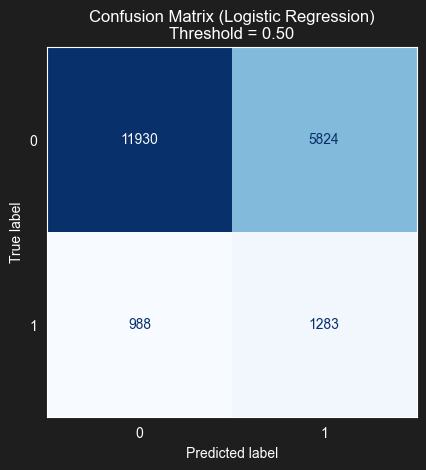

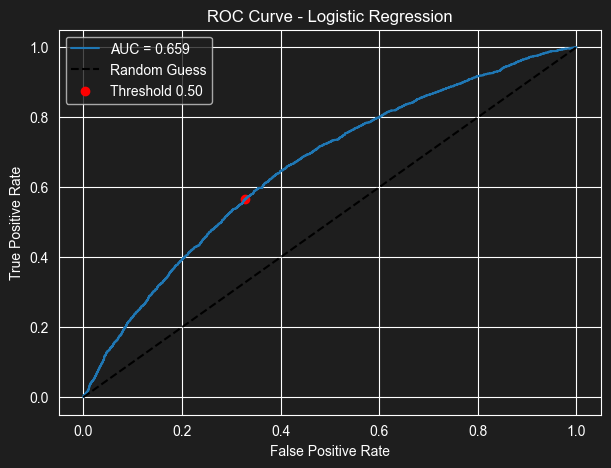

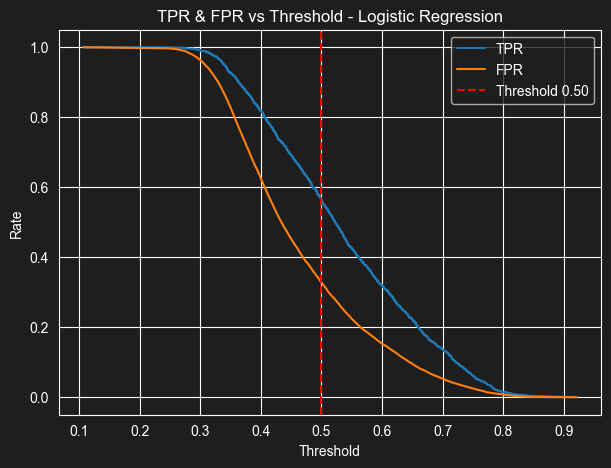

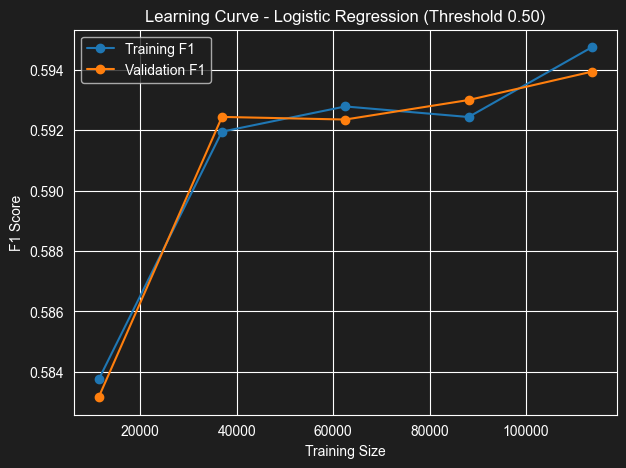


===== 📈 Random Forest =====


<Figure size 500x400 with 0 Axes>

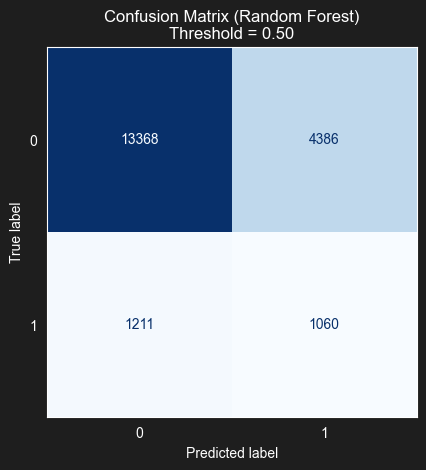

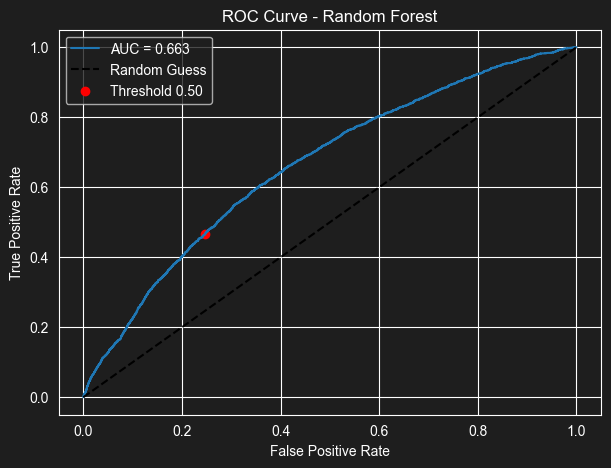

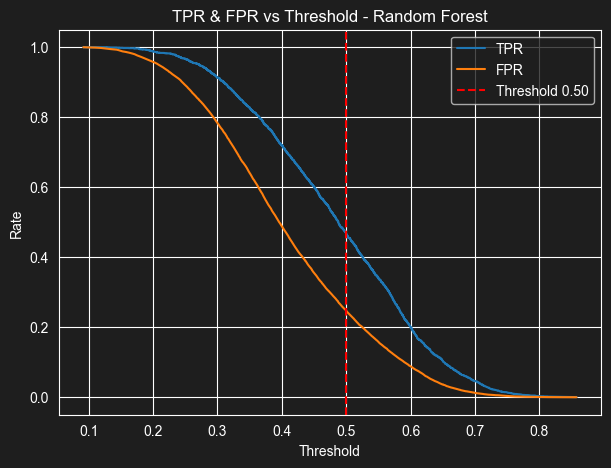

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

def plot_confusion_matrix_with_threshold(y_true, y_proba, threshold, model_name):
    """Plot confusion matrix using a custom threshold."""
    y_pred = (y_proba >= threshold).astype(int)
    plt.figure(figsize=(5, 4))
    cm_display = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred, cmap='Blues', colorbar=False
    )
    plt.title(f"Confusion Matrix ({model_name})\nThreshold = {threshold:.2f}")
    plt.grid(False)
    plt.show()

def plot_roc_curve_with_threshold(y_true, y_proba, threshold, model_name):
    """Plot ROC curve and mark chosen threshold."""
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)

    # Find closest threshold index
    idx = np.argmin(np.abs(thresholds - threshold))

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.scatter(fpr[idx], tpr[idx], color='red', label=f"Threshold {threshold:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot TPR/FPR vs Threshold
    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, tpr, label='TPR')
    plt.plot(thresholds, fpr, label='FPR')
    plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold {threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title(f"TPR & FPR vs Threshold - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_learning_curve_with_threshold(model, X, y, threshold, model_name):
    """Plot learning curve with a custom threshold applied to probabilities."""
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5),
        scoring='f1'
    )

    # learning_curve uses model.predict internally with default threshold
    # So if you want exact threshold control, you’d need a custom scorer
    # For visualization, this is fine:
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, 'o-', label='Training F1')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation F1')
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.title(f"Learning Curve - {model_name} (Threshold {threshold:.2f})")
    plt.legend()
    plt.grid(True)
    plt.show()



model_results = {
    "Logistic Regression": grid_logreg.best_estimator_,
    "Random Forest": grid_rf.best_estimator_,
    "Gradient Boosting": grid_gb.best_estimator_,
    "Voting Classifier": voting_clf
}

for name, model in model_results.items():
    print(f"\n===== 📈 {name} =====")

    # Get probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_full)[:, 1]
    else:
        y_proba = model.decision_function(X_test_full)

    # Confusion matrix & ROC with threshold
    plot_confusion_matrix_with_threshold(y_test, y_proba, threshold, name)
    plot_roc_curve_with_threshold(y_test, y_proba, threshold, name)

    # Learning curve (note: uses default threshold internally)
    plot_learning_curve_with_threshold(model, X_train_full, np.ravel(y_train), threshold, name)


In [ ]:
# Get the best RF model from GridSearchCV
best_rf = grid_rf.best_estimator_

# Predictions on training and test sets using custom threshold
y_proba_train = best_rf.predict_proba(X_train)[:, 1]
y_proba_test = best_rf.predict_proba(X_test)[:, 1]

y_pred_train = (y_proba_train >= threshold).astype(int)
y_pred_test = (y_proba_test >= threshold).astype(int)

# Compute metrics
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print("\n🔍 Model Performance Comparison (Threshold = 0.4):")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Train F1:       {train_f1:.4f}")
print(f"Test F1:        {test_f1:.4f}")

# Interpret the results
acc_gap = abs(train_acc - test_acc)
f1_gap = abs(train_f1 - test_f1)

print("\n📊 Diagnosis:")
if train_acc > test_acc + 0.05:
    print("⚠️ Model is likely OVERFITTING — performs much better on training data.")
elif test_acc > train_acc + 0.05:
    print("⚠️ Model might be UNDERFITTING — performs unexpectedly better on test (could mean noise).")
else:
    print("✅ Model is well-generalized — train and test performance are consistent.")
    
print(f"→ Accuracy Gap: {acc_gap:.4f}")
print(f"→ F1 Gap:       {f1_gap:.4f}")


🔍 Model Performance Comparison (Threshold = 0.4):
Train Accuracy: 0.8205
Test Accuracy:  0.7284
Train F1:       0.8196
Test F1:        0.2142

📊 Diagnosis:
⚠️ Model is likely OVERFITTING — performs much better on training data.
→ Accuracy Gap: 0.0921
→ F1 Gap:       0.6054
